<a href="https://colab.research.google.com/github/NTKhoii/DS102.P21_Lab_3/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection using PCA

Using PCA mechanism to correctly assign the face images to persons on the [Yale Face Dataset](https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/). Download the training data and testing data in this link.

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os
from skimage.transform import resize
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


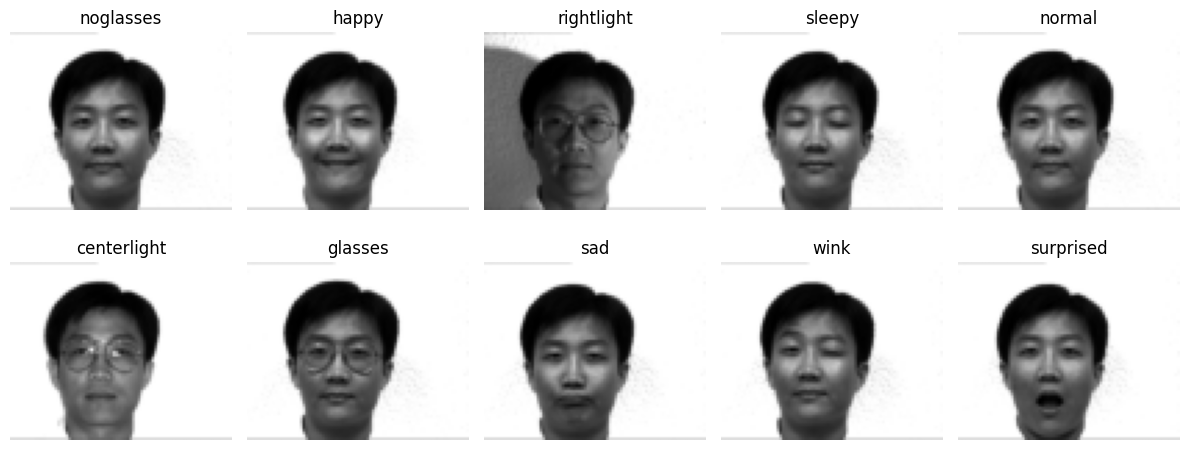

In [ ]:
basedir = '/content/drive/MyDrive/DS102.P21_LAB3/yalefaces/yalefaces'
person_folders= [
    'person-1',
    'person-2',
    'person-3',
    'person-4',
    'person-5',
    'person-6',
    'person-7',
    'person-8',
    'person-9',
    'person-10',
    'person-11',
    'person-12',
    'person-13',
    'person-14',
    'person-15',
]
person = random.choice(person_folders) # Select from the list
plt.figure(figsize=(12, 5))
for ith, filename in enumerate(os.listdir(os.path.join(basedir, person))):
    image = io.imread(os.path.join(basedir, person, filename))
    # Check if the image has an extra dimension of size 1
    if image.shape[0] == 1:
        image = image.squeeze(0)  # Remove the extra dimension only if it exists
    image = resize(image, (64, 80), anti_aliasing=True)
    plt.subplot(2, 5, ith + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(filename)
plt.tight_layout()
plt.show()

## Assignment 1 (4 scores): Implement PCA using Numpy.

In [ ]:
image.shape

(5120,)

In [ ]:
# tạo dictionary lưu trữ thông tin ảnh tương ứng với người
data = {}
for person_folder in person_folders:
  for filename in os.listdir(os.path.join(basedir, person_folder)):
    image = io.imread(os.path.join(basedir, person_folder, filename))
    image = resize(image, (1,64,80), anti_aliasing=True)
    if person_folder not in data:
      data[person_folder] = [image]
    else:
      data[person_folder].append(image)
# duyệt từng người trong bộ data và kết hợp tất cả 10 của 1 người thành một array gồm 10 phần tử
for person in data:
  data[person] = np.concat(data[person], axis=0).reshape(10, -1)

In [ ]:
data

{'person-1': array([[0.99750827, 0.99750827, 0.99750827, ..., 0.99173936, 0.99173936,
         0.99173936],
        [0.99750827, 0.99750827, 0.99750827, ..., 0.995164  , 0.995164  ,
         0.995164  ],
        [0.99732005, 0.99732005, 0.99732005, ..., 0.32338267, 0.32338267,
         0.32338267],
        ...,
        [0.99750827, 0.99750827, 0.99750827, ..., 0.99481012, 0.99481012,
         0.99481012],
        [0.25862633, 0.25862633, 0.25862633, ..., 0.79751261, 0.79751261,
         0.79751261],
        [0.99750827, 0.99750827, 0.99750827, ..., 0.99605075, 0.99605075,
         0.99605075]]),
 'person-2': array([[0.59987323, 0.59987323, 0.59987323, ..., 0.96676811, 0.96676811,
         0.96676811],
        [0.99384688, 0.99384688, 0.99384688, ..., 0.85328737, 0.85328737,
         0.85328737],
        [0.99288818, 0.99288818, 0.99288818, ..., 0.86068491, 0.86068491,
         0.86068491],
        ...,
        [0.9928375 , 0.9928375 , 0.9928375 , ..., 0.84032731, 0.84032731,
         0

In [ ]:
data['person-1'].shape

(10, 5120)

### Implement PCA using Numpy.

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None  # Principal axes
        self.mean_ = None        # Mean of each feature
        self.explained_variance_ = None  # Eigenvalues

    def fit(self, X):
        # 1. Standardize the data (zero mean)
        self.mean_ = np.mean(X, axis=0)
        X_meaned = X - self.mean_

        # 2. Covariance matrix
        covariance_matrix = np.cov(X_meaned, rowvar=False)

        # 3. Eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # 4. Sort eigenvalues and eigenvect ors
        sorted_idx = np.argsort(eigenvalues)[::-1]
        self.explained_variance_ = eigenvalues[sorted_idx][:self.n_components]
        self.components_ = eigenvectors[:, sorted_idx][:, :self.n_components]

    def transform(self, X):
        X_meaned = X - self.mean_
        return np.dot(X_meaned, self.components_)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

## Assignment 2 (4 scores):
- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

### Approximating the Principle Space having 20 dimensions.

In [ ]:
#giữ lại 20 chiều tối ưu nhất
model = PCA(n_components=20)

In [ ]:
images = []
for person in data:
  images.append(data[person])

images = np.concat(images, axis = 0)

In [ ]:
images.shape

(150, 5120)

In [ ]:
images

array([[0.91481718, 0.91481718, 0.91481718, ..., 0.86667179, 0.87246939,
        0.87181341],
       [0.91481718, 0.91481718, 0.91481718, ..., 0.86804194, 0.86395773,
        0.86463203],
       [0.91481718, 0.91481718, 0.91481718, ..., 0.87114935, 0.87036782,
        0.87194764],
       ...,
       [0.91481718, 0.91481718, 0.91481718, ..., 0.86975391, 0.87238829,
        0.87244278],
       [0.72773055, 0.82749212, 0.8031246 , ..., 0.85455105, 0.86259129,
        0.86606633],
       [0.91481718, 0.91481718, 0.91481718, ..., 0.84113268, 0.86653764,
        0.80741826]])

In [ ]:
model.fit(images)

In [ ]:
# Xem giá trị riêng tương ứng với vevtor riêng giữ nhiều thông tin nhất
model.explained_variance_

array([109.23753032,  49.18696706,  30.30123433,  25.76986324,
        16.22085192,  13.87263551,   9.37907303,   7.48584801,
         7.26217523,   6.00898631,   4.1986987 ,   3.4988104 ,
         3.03192477,   2.90333237,   2.61038737,   2.51202083,
         2.15595438,   2.0599532 ,   1.95106016,   1.6528585 ])

In [ ]:
images.shape

(150, 5120)

In [ ]:
model.components_.shape

(5120, 20)

### Visualize the base of this Principle Space.

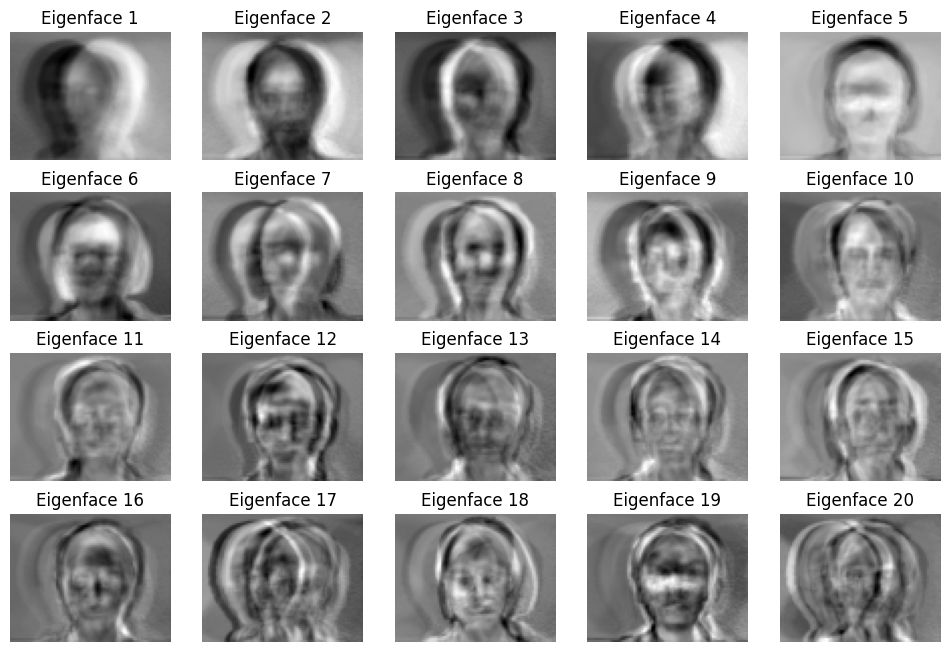

In [ ]:
eigenvectors = model.components_.real.astype(np.float32)
eigen_faces=eigenvectors.T
eigen_faces=eigen_faces.reshape(20,64,80)
plt.figure(figsize=(12,8))
for i, eigen_face in enumerate(eigen_faces):
  plt.subplot(4,5,i+1)
  plt.imshow(eigen_face,cmap='gray')
  plt.axis('off')
  plt.title(f'Eigenface {i+1}')
plt.show()

In [ ]:
mean_faces={}
for person in data.keys():
  mean_faces[person]=np.mean(data[person],axis=0)

In [ ]:
mean_faces

{'person-1': array([0.85419198, 0.85366156, 0.85297667, ..., 0.8303818 , 0.82890742,
        0.8257649 ]),
 'person-2': array([0.86544893, 0.88261908, 0.87843098, ..., 0.65963892, 0.71646007,
        0.68067589]),
 'person-3': array([0.88537218, 0.8878378 , 0.88600453, ..., 0.78256216, 0.78355067,
        0.77931486]),
 'person-4': array([0.87969966, 0.88051314, 0.88361268, ..., 0.72219289, 0.74870393,
        0.80440018]),
 'person-5': array([0.87413693, 0.87355455, 0.87875135, ..., 0.43889482, 0.43011748,
        0.41276937]),
 'person-6': array([0.86571086, 0.90672724, 0.90728528, ..., 0.75620439, 0.75566818,
        0.7240958 ]),
 'person-7': array([0.9108284 , 0.91332992, 0.91410989, ..., 0.84107537, 0.85577481,
        0.8583894 ]),
 'person-8': array([0.91467928, 0.91475662, 0.91481714, ..., 0.76983082, 0.77107141,
        0.7555712 ]),
 'person-9': array([0.91130895, 0.91350963, 0.91384883, ..., 0.78268471, 0.78721262,
        0.77856838]),
 'person-10': array([0.91386501, 0.91

### Reading the training images.

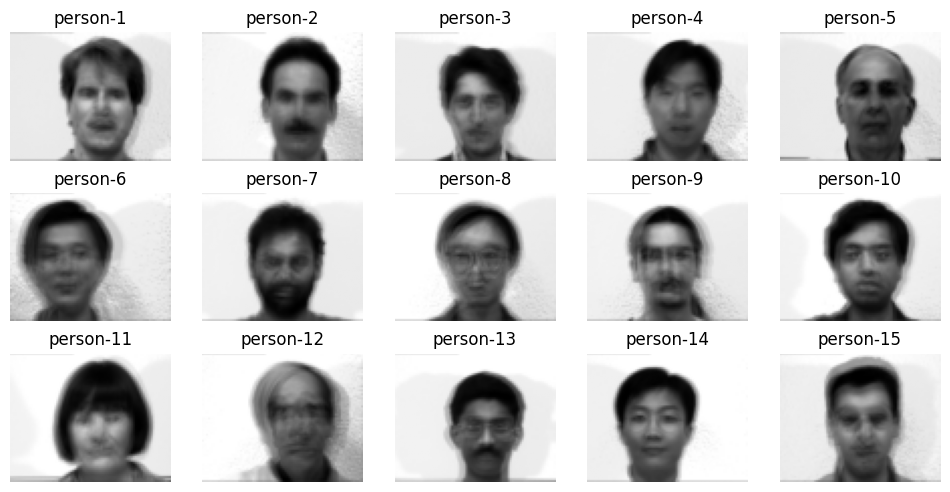

In [ ]:
plt.figure(figsize=(12,8))
for i, person in enumerate(mean_faces):
  mean_face=mean_faces[person]
  mean_face=mean_face.reshape(64,80)
  plt.subplot(4,5,i+1)
  plt.imshow(mean_face,cmap='gray')
  plt.axis('off')
  plt.title(person)
plt.show()

In [ ]:
Transform_mean_face={}
for person in mean_faces:
  Transform_mean_face[person]=model.transform(mean_faces[person].T)

In [ ]:
Transform_mean_face

{'person-1': array([-4.45365321, -0.8268319 ,  3.20243885,  1.4096828 ,  3.23492821,
         0.22585586, -0.92798436,  0.29944239,  1.97474157,  4.92004796,
         1.27372632, -1.7170884 ,  0.08360442, -0.26940603, -1.14838447,
         1.65503398, -0.07859191,  0.13225027,  0.71233505,  1.22747974]),
 'person-2': array([-10.44050323,  -2.93551146,   5.68735157,   3.55085713,
          2.11805164,   1.5542098 ,  -4.81719068,  -2.99800001,
         -1.27213493,  -0.14126188,  -1.37251105,   1.2266917 ,
          2.09783429,   1.73970502,   0.51484578,   0.05925951,
          0.87202103,  -0.16273143,   0.19824214,   0.31268393]),
 'person-3': array([ 1.46701204,  3.34168627, -5.05321733, -0.5129304 , -3.50117964,
        -1.19145389, -0.07585842, -0.97055284,  1.80142047,  1.81927308,
         0.39568912,  1.1469948 , -1.18558931,  1.33427772,  0.01981724,
         1.27485449, -1.14064951,  0.74041255, -0.51086192, -0.86673173]),
 'person-4': array([-7.2482936 , -2.74732212,  0.85324

In [ ]:
a=Transform_mean_face['person-1']
a.shape

(20,)

In [ ]:
b=mean_faces['person-1']
b.shape

(5120,)

## Assignment 3 (2 scores):
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

### Assign persons to the face images in testing data.

In [ ]:
test_dir='/content/drive/MyDrive/DS102.P21_LAB3/yalefaces/yalefaces/test'
labels=[]
testimages=[]
for filename in os.listdir(test_dir):
  labels.append(filename.split('.')[0])
  image=io.imread(os.path.join(test_dir,filename))
  image=resize(image,(1,64,80),anti_aliasing=True)
  testimages.append(image)
testimages=np.concatenate(testimages,axis=0)
testimages.shape

(15, 64, 80)

In [ ]:
labels

['person-9',
 'person-15',
 'person-14',
 'person-3',
 'person-13',
 'person-6',
 'person-4',
 'person-12',
 'person-7',
 'person-8',
 'person-5',
 'person-2',
 'person-10',
 'person-1',
 'person-11']

In [ ]:
def Distance(X,Y):
  distance=np.sqrt(np.sum((X-Y)**2))
  return distance

In [ ]:
predict={}
for label,image in zip(labels,testimages):
  image=image.reshape(-1)
  Transform_testface=model.transform(image)
  closest_distance=np.inf
  closest_person=None
  for person in Transform_mean_face:
    mean_face = Transform_mean_face[person]
    distance=Distance(Transform_testface,mean_face)
    if distance<closest_distance:
      closest_distance=distance
      closest_person=person
    predict[label]=closest_person

In [ ]:
predict

{'person-9': 'person-9',
 'person-15': 'person-15',
 'person-14': 'person-12',
 'person-3': 'person-3',
 'person-13': 'person-13',
 'person-6': 'person-14',
 'person-4': 'person-4',
 'person-12': 'person-2',
 'person-7': 'person-7',
 'person-8': 'person-15',
 'person-5': 'person-5',
 'person-2': 'person-12',
 'person-10': 'person-10',
 'person-1': 'person-1',
 'person-11': 'person-11'}

### Evaluate the accuracy of this face recognition system.

In [ ]:
ACC=[]
for label in predict:
  if predict[label]==label:
    ACC.append(1)
  else:
    ACC.append(0)
print(f'Accuracy: {np.mean(ACC)*100}%')

Accuracy: 66.66666666666666%


## Dùng PCA thông qua thư viện Sklearn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [ ]:
X_pca = pca.fit_transform(images)

In [ ]:
print(pca.explained_variance_ratio_)

[0.32720922 0.14733425 0.09076407 0.07719084 0.04858781 0.04155398
 0.028094   0.02242305 0.02175306 0.01799927 0.01257675 0.01048029
 0.00908157 0.00869658 0.00781883 0.00752431 0.0064576  0.00616994
 0.00584019 0.00494653]


In [ ]:
print(sum(pca.explained_variance_ratio_))

0.9025021396760161


In [ ]:
pca.components_.shape

(20, 5120)

In [ ]:
Transform_mean_face={}
for person in mean_faces:
  # Reshape to a 2D array with one sample before transforming
  Transform_mean_face[person]=pca.transform(mean_faces[person].reshape(1, -1))

In [ ]:
predict={}
for label,image in zip(labels,testimages):
  # Reshape to a 2D array with one sample before transforming
  image=image.reshape(1, -1)
  Transform_testface=pca.transform(image)
  closest_distance=np.inf
  closest_person=None
  for person in Transform_mean_face:
    mean_face = Transform_mean_face[person]
    distance=Distance(Transform_testface,mean_face)
    if distance<closest_distance:
      closest_distance=distance
      closest_person=person
    predict[label]=closest_person

In [ ]:
predict

{'person-9': 'person-9',
 'person-15': 'person-15',
 'person-14': 'person-12',
 'person-3': 'person-3',
 'person-13': 'person-13',
 'person-6': 'person-14',
 'person-4': 'person-4',
 'person-12': 'person-2',
 'person-7': 'person-7',
 'person-8': 'person-15',
 'person-5': 'person-5',
 'person-2': 'person-12',
 'person-10': 'person-10',
 'person-1': 'person-1',
 'person-11': 'person-11'}

In [ ]:
ACC=[]
for label in predict:
  if predict[label]==label:
    ACC.append(1)
  else:
    ACC.append(0)
print(f'Accuracy: {np.mean(ACC)*100}%')

Accuracy: 66.66666666666666%
